# Some Probability Distributions

This notebook introduces the **scipy.stats** package through a review of common probability distributions.

## 1 Introduction

### 1.1 Preparation

You should already have Python 3 installed, hopefully through the **conda** utility.  But you may not have installed the **scipy** module.  It's easy enough to check.  If you have `scipy` installed, you can list its details in the following way.

```
workshops/distributions/python$ conda list scipy
# packages in environment at /Users/pglezen/apps/miniconda3:
#
scipy                     0.17.0              np111py35_4
```

If instead of `scipy` you see a blank line, you can install it with the following `conda` command.

```
conda install scipy
```

If you already have it installed, you may still wish to update it to the latest version.

```
conda update scipy
```

Of course, this only applies to the *current conda execution environment*.  If you don't know what that is, then you probably only have one, so you're probably fine.

Once you have the package installed, you should bookmark the documentation in your web browser for easy reference.  The **scipy** project has many nice packages.  The API for the **stats** package is available at

<https://docs.scipy.org/doc/scipy/reference/stats.html>

The SciPy homepage is https://scipy.org/.

### 1.2 Conventions

SciPy has consistent naming conventions for methods on probability
distribution objects.

* `pmf` - probability mass function for discrete distributions
* `cdf` - cumulative distribution
* `ppf` - percentage point function (inverse of CDF)
* `rvs` - random variate sampling

### Import

The top level package name for the SciPy statistical objects is `scipy.stats`.  To make working with individual objects more
convenient, we'll import them directly into our namespace rather
than referencing them through their full package references.
So instead of

```
import scipy.stats.binom
```

to reference binomial distribution functions through `scipy.stats.binom`, we'll use

In [2]:
from scipy.stats import binom
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

This makes the `binom` object referenceable directly.  The

```
from <this package> import <that object>
```

style of import will be used throughout this workshop to
reference Python distribution objects.

### Frozen Parameters

Most probability distributions require certain parameters
to be completely specified.  For example, the binomial
distribution requires two parameters:

* `n` - the number of bernoulli trials
* `p` - the probability of success for each trial

These two parameters must be specified for each invocation
of a `binom` object, along with the function arguments.  If
the distribution parameters are expected to be constant through
out a session, one can *freeze* the parameter values.

```
b = binom(100, 0.2)
```
You can then invoke all the `binom` methods on `myRV` without
specifying the `n` and `p` parameters.

## 2 Discrete Distributions

The following sections introduce SciPy objects working with
discrete distributions.  In addition to methods particular
to each distribution, the
[rv_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html#scipy.stats.rv_discrete)
page documents methods common to all discrete distributions.

### 2.1 Binomial

The binomial distribution is handled by the 
[binom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom)
object.  Let's create an instance **frozen** at 100 trials
with probability of 0.2 success rate.  We'll invoke our 
distribution methods on this instance.

In [3]:
b = binom(100, 0.2)

With `b` as our binomial instance frozen at 100 trials with 0.2 chance
of succeeding each time, let's start with the *probability mass function*,
or `pmf`.  This is equation (7) of the math supplement.

$$
f_X(i) = \sum_{i=0}^n {n \choose i} p^i (1-p)^{n-i}
$$

Here we consider the case of $n=100$ and $p=0.2$. We suspect that
the highest probability will be around 20 successes since the probability
of each success is 0.2 and there are 100 trials.  The `pmf` function accepts
numeric arrays, so we'll check `10`, `20`, and `30` in one go.

In [4]:
b.pmf([10, 20, 30])

array([ 0.00336282,  0.09930021,  0.00518964])

Sure enough, the PMF function shows a 9.9% chance of obtaining
exactly 20 successes.  The probabilities for 10 and 30 are each
less than 1%.

Now let's check the associated cumulative distribution function,
or CDF.  The CDF at a point is the cumulation of probability from
the PMF for all points equal or less.  Since we expect the average
to be around 20, the CDF should be close to 0.5.

In [5]:
b.cdf([10, 20, 30])

array([ 0.00569638,  0.55946158,  0.99394066])

This shows that the probability of having *less than or equal to 10 successes*
is 0.57%.  The probability of having *less than or equal to 20 successes*
is 56%.  The probabiliy of having *less than or equal to 30 successes*
is 99.4%.

To better see the relationship between the PMF and CDF, we can
plot them.

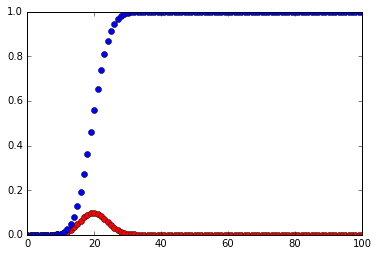

In [6]:
fig, ax = plt.subplots(1,1)
x = np.arange(101)
ax.plot(x, b.pmf(x), 'ro')
ax.plot(x, b.cdf(x), 'bo')
plt.show()

The PMF is in red.  The CDF is in blue.
The blue value at each point is the sum of all the
red points at or before it.  Let's verify this
for the probability of 22 or fewer successes.
The `np.arange` function is used which returns a
sequence of integers from 0 to one less than the
argument.

In [7]:
b.pmf(np.arange(23)).sum()

0.73893275233089206

In [8]:
b.cdf(22)

0.73893275233090572

With the `pmf`, we summed all the values of the PMF
from 0 to 22.  But this is precisely what the CDF does.

**Quantiles** are the inverse of the CDF function.
For any probability, a quantile function tells us the
value of the random variable for which the CDF is
equal to that probability.  The SciPy stats function
for this is **ppf**, or *percentage point function*.

How many successes can we expect to happen 25% of the time?

In [9]:
b.ppf(0.25)

17.0

This means that 25% of the time, the number of successes
will be 17 or less.  We can pass in arrays just like we
did for `pmf`.

In [10]:
b.ppf([0.25, 0.5, 0.75])

array([ 17.,  20.,  23.])

The reasons these come out exact integers is the
binomial random variables only take integer values.
The `ppf` can be interpreted as *the smallest integer
number of successes with probabiliy greater than or equal
the argument*.  So it's not a strict inverse.

In [11]:
b.cdf([16, 17, 19, 20, 22, 23])


array([ 0.19233758,  0.27118896,  0.46016137,  0.55946158,  0.73893275,
        0.81091279])

Sometimes it's useful to generate random samples from a distribution.
In other words, the numbers are generated as if they came from random
variable values associated with the outcomes of the experiement.
The `rvs` method is used for this.

In [12]:
b_sample = b.rvs(size=1000)
b_sample[0:100]

array([ 8, 23, 21, 26, 15, 21, 17, 13, 31, 20, 20, 11, 17, 17, 23, 23, 17,
       15, 22, 23, 25, 17, 22, 27, 23, 20, 20, 22, 20, 19, 18, 20, 22, 19,
       24, 20, 16, 15, 17, 19, 18, 15, 15, 23, 17, 22, 16, 14, 23, 12, 17,
       22, 20, 20, 15, 17, 16, 15, 16, 16, 17, 22, 22, 14, 19, 19, 22, 15,
       20, 15, 16, 16, 22, 31, 20, 21, 24, 20, 25, 17, 17, 17, 19, 13, 25,
       24, 19, 14, 22, 21, 25, 17, 18, 18, 18, 21, 26, 19, 23, 20])

This simulates the arduous task of

1. flipping an unfair coin (with 20% chance of heads) 100 times,
2. noting the number of heads,
3. writing it down,
4. repeat steps 1-3 for 1,000 times

It's fun to plot a histogram of our sample.
It should have a shape close to our PMF.

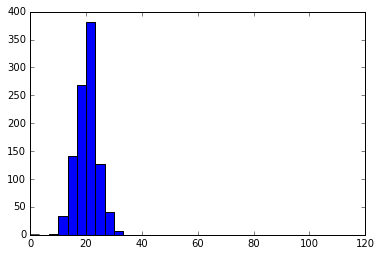

In [13]:
fig, ax = plt.subplots()
ax.hist(b_sample, bins=30, range=(0,100))
plt.show()

## 2.2 Poisson

The Poisson random variable represents the number of occurrences of an event
over a fixed interval of time.
An example could be the number of new cases opened per day.
The parameter of the random variable, usually
denoted by $\lambda$, turns out to be the expected number of occurrences.
The Poisson density function is given by

$$
f_X(i;\lambda) = e^{-\lambda} \frac{\lambda^i}{i!}
$$

For each $i$, this represents the probability of observing $i$ counts within
the unit time period.
The SciPy package provides the usual discrete random variable methods for
a Poisson random variable object.

* `pmf` - probability mass functon
* `cdf` - cumulative distribution function
* `ppf` - percentage point function (inverse of CDF)
* `rvs` - random variate sample

Let's consider a case of a process where the expected
number of occurrences per time period is 5.  We'll freeze a SciPy Poisson
object with this parameter.

In [14]:
from scipy.stats import poisson
p5 = poisson(5)

Since 5 is the expected value, we expect the mass function to be
strongest around 5.

In [15]:
p5.pmf([3,5,7]) * 100

array([ 14.03738958,  17.54673698,  10.4444863 ])

We see a 14% chance of getting a count of **3**, a 17.5% chance
of getting a **5** count, and a 10.4% chance of getting a **7** count.

Now let's check the cumulative distribution function (CDF).

In [16]:
p5.cdf([3,5,7]) * 100

array([ 26.50259153,  61.59606548,  86.66283259])

The chance of getting
* 3 or less is 27%
* 5 or less is 62%
* 7 or less is 87%

Let's view this graphically.

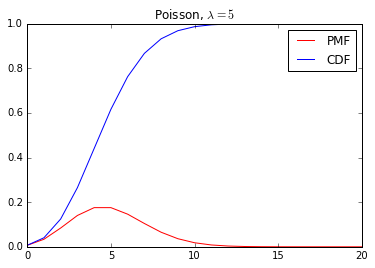

In [17]:
x = np.arange(21)
fig, ax = plt.subplots(1,1)
ax.plot(x, p5.pmf(x), 'r-', label="PMF")
ax.plot(x, p5.cdf(x), 'b-', label="CDF")
ax.legend()
plt.title("Poisson, $\lambda = 5$")
plt.show()

The standard quartiles are given by

In [18]:
p5.ppf([0.25, 0.5, 0.75])

array([ 3.,  5.,  6.])

* 3 is the smallest count that occurs at least 25% of the time
* 5 is the smallest count that occurs at least 50% of the time
* 6 is the smallest count that occurs at least 75% of the time

Finally, let's generate some Poisson random numbers.  This is
like counting occurrences of 1,000 outcomes for a Poisson process
with $\lambda = 5$.

In [19]:
p5_sample = p5.rvs(size=1000)
p5_sample[0:100]

array([ 6,  5, 10,  6,  5,  4,  5,  2,  7,  9,  5,  2,  3,  5,  7,  2,  6,
        8,  4,  5,  9,  9,  2,  3,  6, 12,  4,  1,  3,  4,  1,  1,  7,  8,
        5,  9,  1,  6,  7,  6,  3,  9,  3,  6,  6,  6,  4,  5,  2,  5,  1,
        7,  7,  7,  7,  3,  4,  7,  5,  3,  7, 10,  2,  5,  2,  4,  7,  2,
        3,  6,  3,  4,  2,  5,  2,  7,  2,  5,  4,  8,  4,  2,  5, 10,  4,
        2,  4,  4,  5, 10,  8,  7, 10,  9,  2,  6,  3,  8,  2,  9])

Let's check that the histogram of our sample looks anything like our PMF.

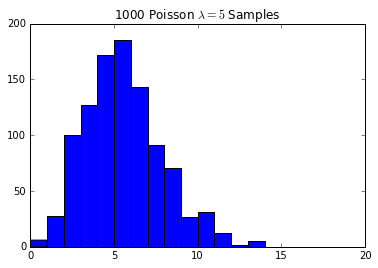

In [20]:
fig, ax = plt.subplots(1,1)
ax.hist(p5_sample, bins=20, range=(0, 20))
plt.title("1000 Poisson $\lambda=5$ Samples")
plt.show()